In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
##customizing matplotlib
plt.rcParams['figure.figsize'] = [10,8]# for 8:5 ratio
plt.rcParams['font.size'] = 14
plt.style.use('seaborn-whitegrid')

## Data describtion

    1. Title: Boston Housing Data

    2. Sources:
       (a) Origin:  This dataset was taken from the StatLib library which is
                    maintained at Carnegie Mellon University.
       (b) Creator:  Harrison, D. and Rubinfeld, D.L. 'Hedonic prices and the 
                     demand for clean air', J. Environ. Economics & Management,
                     vol.5, 81-102, 1978.
       (c) Date: July 7, 1993

    3. Past Usage:
       -   Used in Belsley, Kuh & Welsch, 'Regression diagnostics ...', Wiley, 
           1980.   N.B. Various transformations are used in the table on
           pages 244-261.
        -  Quinlan,R. (1993). Combining Instance-Based and Model-Based Learning.
           In Proceedings on the Tenth International Conference of Machine 
           Learning, 236-243, University of Massachusetts, Amherst. Morgan
           Kaufmann.

    4. Relevant Information:

       Concerns housing values in suburbs of Boston.

    5. Number of Instances: 506

    6. Number of Attributes: 13 continuous attributes (including "class"
                             attribute "MEDV"), 1 binary-valued attribute.

    7. Attribute Information:

        1. CRIM      per capita crime rate by town
        2. ZN        proportion of residential land zoned for lots over 
                     25,000 sq.ft.
        3. INDUS     proportion of non-retail business acres per town
        4. CHAS      Charles River dummy variable (= 1 if tract bounds 
                     river; 0 otherwise)
        5. NOX       nitric oxides concentration (parts per 10 million)
        6. RM        average number of rooms per dwelling
        7. AGE       proportion of owner-occupied units built prior to 1940
        8. DIS       weighted distances to five Boston employment centres
        9. RAD       index of accessibility to radial highways
        10. TAX      full-value property-tax rate per $10,000
        11. PTRATIO  pupil-teacher ratio by town
        12. B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks 
                     by town
        13. LSTAT    % lower status of the population
        14. MEDV     Median value of owner-occupied homes in $1000's






## import the data

In [3]:
housing = pd.read_csv("real_estate_data.csv")
# cor = housing.corr()
# cor["MEDV"].sort_values()
housing

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [4]:
housing.info()
##evey column is numeric type so no need to convert any object to numbers

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       501 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [5]:
housing.nunique()

CRIM       504
ZN          26
INDUS       76
CHAS         2
NOX         81
RM         441
AGE        356
DIS        412
RAD          9
TAX         66
PTRATIO     46
B          357
LSTAT      455
MEDV       229
dtype: int64

In [6]:
housing.isnull().sum()


CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         5
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [7]:
housing[housing.RM.isnull()]

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
10,0.22489,12.5,7.87,0,0.524,NaN,94.3,6.3467,5,311,15.2,392.52,20.45,15.0
35,0.06417,0.0,5.96,0,0.499,NaN,68.2,3.3603,5,279,19.2,396.90,9.68,18.9
63,0.12650,25.0,5.13,0,0.453,NaN,43.4,7.9809,8,284,19.7,395.58,9.50,25.0
96,0.11504,0.0,2.89,0,0.445,NaN,69.6,3.4952,2,276,18.0,391.83,11.34,21.4
135,0.55778,0.0,21.89,0,0.624,NaN,98.2,2.1107,4,437,21.2,394.67,16.96,18.1


In [8]:
5/505*100

0.9900990099009901

<AxesSubplot:>

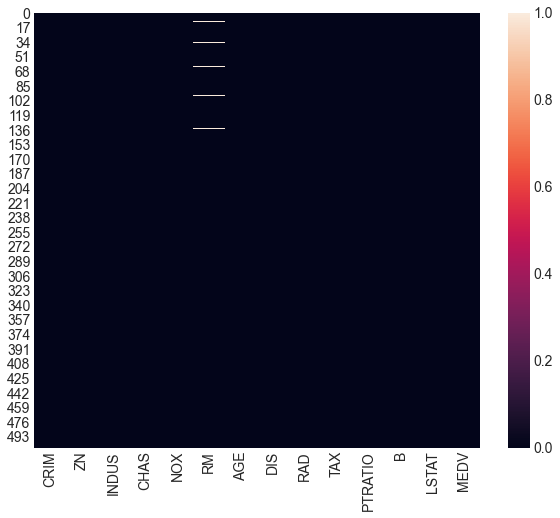

In [9]:
sns.heatmap(housing.isnull())

### filling the null values

In [10]:
housing.RM.describe()

count    501.000000
mean       6.284341
std        0.705587
min        3.561000
25%        5.884000
50%        6.208000
75%        6.625000
max        8.780000
Name: RM, dtype: float64

In [11]:
housing.RM.fillna(housing.RM.mean(),inplace=True)

In [12]:
housing.skew()

CRIM       5.223149
ZN         2.225666
INDUS      0.295022
CHAS       3.405904
NOX        0.729308
RM         0.405418
AGE       -0.598963
DIS        1.011781
RAD        1.004815
TAX        0.669956
PTRATIO   -0.802325
B         -2.890374
LSTAT      0.906460
MEDV       1.108098
dtype: float64

In [13]:
housing.isnull().sum()


CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [14]:
X = housing.drop("MEDV", axis=1)
y = housing.MEDV.copy()

In [15]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=324) 

In [16]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(404, 13)
(404,)
(102, 13)
(102,)


# Scaling the data
    Scaling : transform the data such that mean will be 0 and std will be 1
    

In [17]:
#standard scaler will replace all the value such that standard deviation of each column will be one
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [18]:
X_train = scaler.fit_transform(X_train)

### checking the std and mean of scaled data

In [19]:
X_df = pd.DataFrame(X_train,columns=housing.columns[:-1])
X_df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,-0.106996,-0.495453,1.014461,-0.283221,-0.198868,-0.719828,-1.044010,0.127325,1.675791,1.539002,0.792341,0.392351,-0.320521
1,-0.248735,-0.495453,1.228978,3.530817,0.423164,2.980913,0.893414,-0.768707,-0.512229,-0.030473,-1.750751,0.342192,-1.321754
2,-0.404984,1.386958,-1.110411,-0.283221,-1.008361,1.285625,-1.550054,1.229374,-0.512229,-0.060311,-1.519561,0.365083,-1.385212
3,-0.392993,0.424837,-0.759648,-0.283221,-1.059487,-0.062674,0.362068,1.958537,-0.281912,-0.466107,0.283723,0.204057,-0.358596
4,-0.407725,-0.495453,-0.856760,-0.283221,-0.343724,-0.428074,-0.386154,0.457685,-0.512229,-1.098671,0.792341,0.437012,-0.479872
...,...,...,...,...,...,...,...,...,...,...,...,...,...
399,-0.401934,0.341174,-0.600210,-0.283221,-0.778294,0.379205,-0.378924,0.043659,-0.742547,-1.104639,0.052533,0.415243,-0.699861
400,-0.408261,-0.495453,-1.114759,-0.283221,-0.565270,1.043441,0.618705,-0.185775,-0.857706,-0.824162,-0.317371,0.437012,-1.014333
401,0.226109,-0.495453,1.014461,-0.283221,1.173010,0.190840,0.969321,-0.993235,1.675791,1.539002,0.792341,0.437012,0.941597
402,-0.391955,0.424837,-0.759648,-0.283221,-1.059487,-0.959180,0.264474,1.911984,-0.281912,-0.466107,0.283723,0.163100,-0.027202


In [20]:
X_df.std()

CRIM       1.00124
ZN         1.00124
INDUS      1.00124
CHAS       1.00124
NOX        1.00124
RM         1.00124
AGE        1.00124
DIS        1.00124
RAD        1.00124
TAX        1.00124
PTRATIO    1.00124
B          1.00124
LSTAT      1.00124
dtype: float64

In [21]:
X_df.mean()

CRIM      -8.244230e-19
ZN         1.232512e-16
INDUS      4.105627e-16
CHAS      -1.041521e-16
NOX       -2.737084e-16
RM         5.650046e-16
AGE        9.893076e-18
DIS        9.343461e-18
RAD       -4.891577e-17
TAX        1.371720e-16
PTRATIO    7.436296e-16
B         -5.853404e-16
LSTAT      6.485461e-17
dtype: float64

In [22]:
X_df.skew()

CRIM       5.142249
ZN         2.158296
INDUS      0.283104
CHAS       3.259712
NOX        0.729418
RM         0.359261
AGE       -0.600304
DIS        1.044985
RAD        1.023725
TAX        0.670046
PTRATIO   -0.784203
B         -2.917229
LSTAT      0.924920
dtype: float64

## Creating model
    Model tried:
        1. LinearRegressor
        2. DecisionTreeRegressor
        3. RandomForestRegressor(best)

In [23]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
model = [LinearRegression(),DecisionTreeRegressor(),RandomForestRegressor()]
for i in model:
    i.fit(X_train, y_train)

## Evaluting all model using rmse on train data

In [24]:
from sklearn.metrics import mean_squared_error
housing_predictions = []
for c,i in enumerate(model):
    housing_predictions.append(i.predict(X_train)) 
    mse = mean_squared_error(y_train, housing_predictions[c])
    rmse = np.sqrt(mse)
    print(f"{i} RMSE value : {rmse}")

LinearRegression() RMSE value : 4.823462008208031
DecisionTreeRegressor() RMSE value : 0.0
RandomForestRegressor() RMSE value : 1.1697488009935062


### NOTE
    Decision tree is over fitted as the error is 0
    Random forest model is better as the error is lower than linear regression model

## Testing model on test data 
    

In [25]:
X_test_prepared = scaler.transform(X_test)
final_predictions = []
for i in model:
    final_predictions.append(i.predict(X_test_prepared)) 

In [26]:
##evalulatind test data
for i,j in zip(final_predictions,model):
    final_mse = mean_squared_error(y_test, i)
    final_rmse = np.sqrt(final_mse)
    print(f"{j}----->{final_rmse}")

LinearRegression()----->4.162993449872926
DecisionTreeRegressor()----->3.434827392415269
RandomForestRegressor()----->2.910347597324915


## NOTE
     Random forest has lowest error on test data
     Since Decision tree was overfitted it has more error on test data
   
     

<AxesSubplot:xlabel='MEDV', ylabel='Density'>

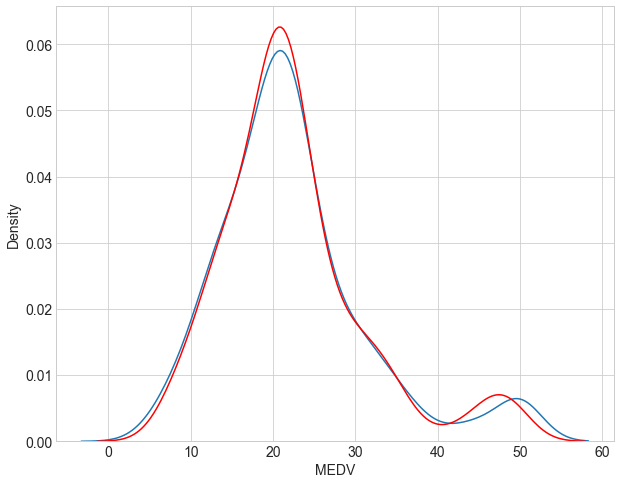

In [34]:
sns.kdeplot(y_train);
sns.kdeplot(housing_predictions[2], color="Red")

<AxesSubplot:xlabel='MEDV', ylabel='Density'>

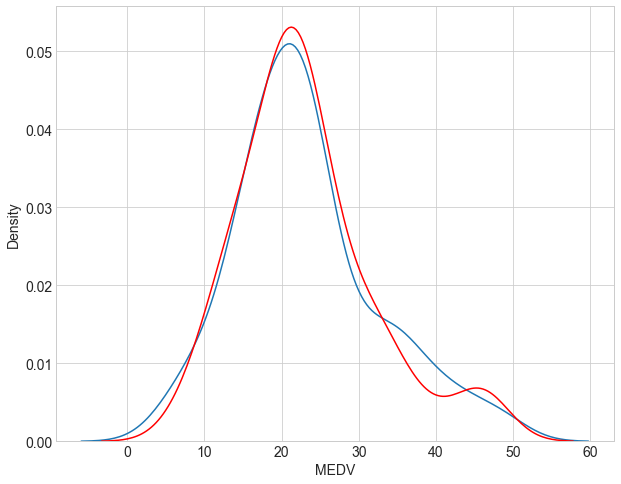

In [33]:
sns.kdeplot(y_test);
sns.kdeplot(final_predictions[2], color="Red")